# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
rows, columns = df.shape
print(f'The data has {rows} rows and {columns} columns.')

The data has 1898 rows and 9 columns.


#### Observations:
Many more rows than columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The DataFrame contains a total of 1898 entries, indicating the number of orders recorded.

All columns have 1898 non-null entries, which means there are no null values in any of the columns.
Data Types:

order_id, customer_id, food_preparation_time, and delivery_time are of type int64, indicating that these columns store integer values.
cost_of_the_order is of type float64, indicating that this column stores floating-point numbers representing the cost of the orders.
restaurant_name, cuisine_type, day_of_the_week, and rating are of type object, indicating that these columns store text data.
Memory Usage:

The DataFrame uses approximately 133.6 KB of memory.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
df.isna().sum()
# Replace 'Not given' placeholders with NaN in the rating column
df['rating'] = df['rating'].replace('Not given', np.nan)

# Ensure the correct data types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Replace missing values in 'rating' with the median
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)

#### Observations:
There are no missing values, but there are placeholder values in ratings column.  By default the dataframe does not treat these as missing values, but you could set 'Not Given' as a missing value if needed. 

Because rating is important I will replace it with the median value.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Get the statistical summary of the food_preparation_time column
preparation_time_summary = df['food_preparation_time'].describe()
print(preparation_time_summary)

# Extracting the specific values
min_time = preparation_time_summary['min']
avg_time = preparation_time_summary['mean']
max_time = preparation_time_summary['max']

print(f"Minimum preparation time: {min_time} minutes")
print(f"Average preparation time: {avg_time:.2f} minutes")
print(f"Maximum preparation time: {max_time} minutes")

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
Minimum preparation time: 20.0 minutes
Average preparation time: 27.37 minutes
Maximum preparation time: 35.0 minutes


Minimum preparation time: 20.0 minutes
Average preparation time: 27.37 minutes
Maximum preparation time: 35.0 minutes
Data is fairly normalized.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df = pd.read_csv('foodhub_order.csv')
placeholder_count = (df['rating'] == 'Not given').sum()
print(f"Number of 'Not given' placeholders in the 'rating' column: {placeholder_count}")
not_rated_percentage = (placeholder_count / rows) * 100
print(f"The percentage of orders that are not rated: {not_rated_percentage:.2f}%")

Number of 'Not given' placeholders in the 'rating' column: 736
The percentage of orders that are not rated: 38.78%


#### Observations:
38.78% of orders are not rated.  

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

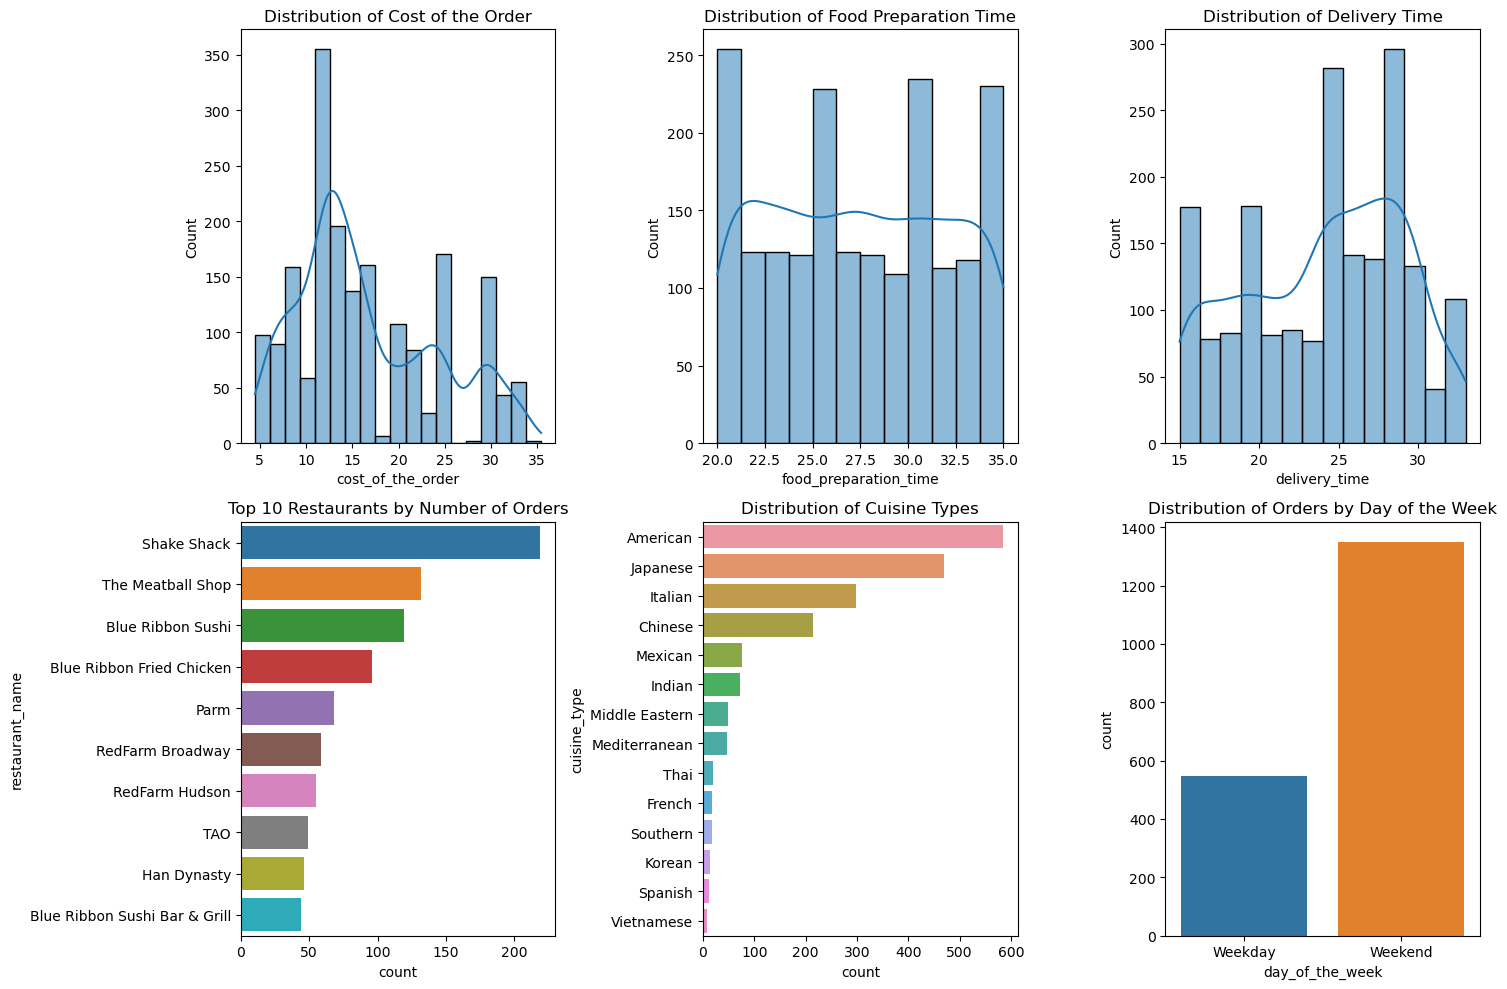

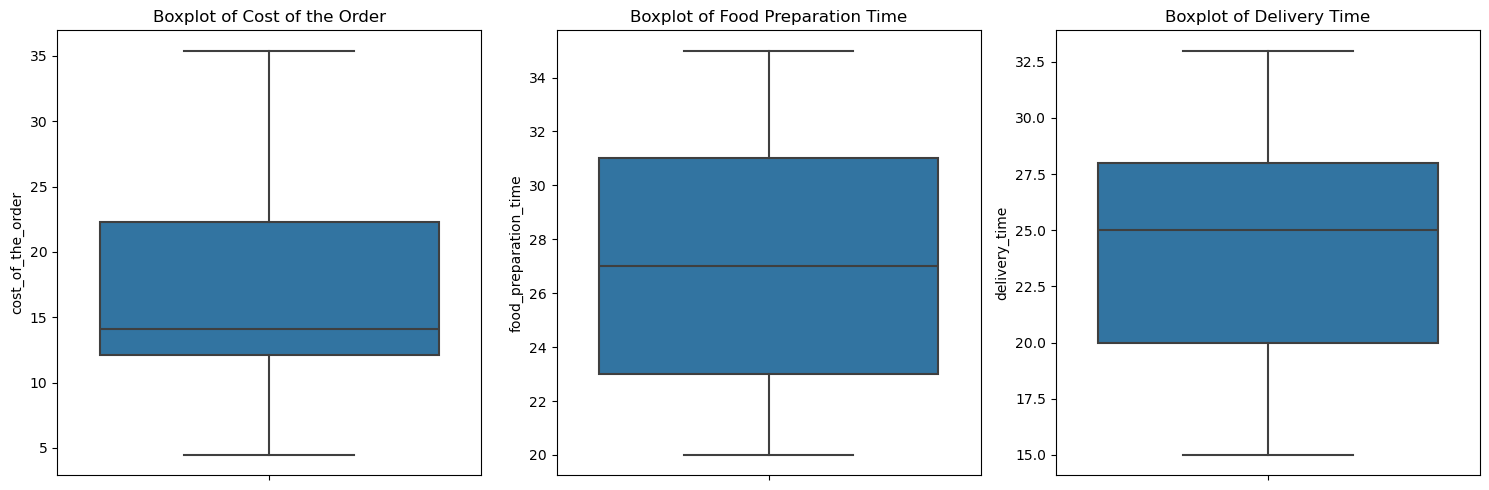

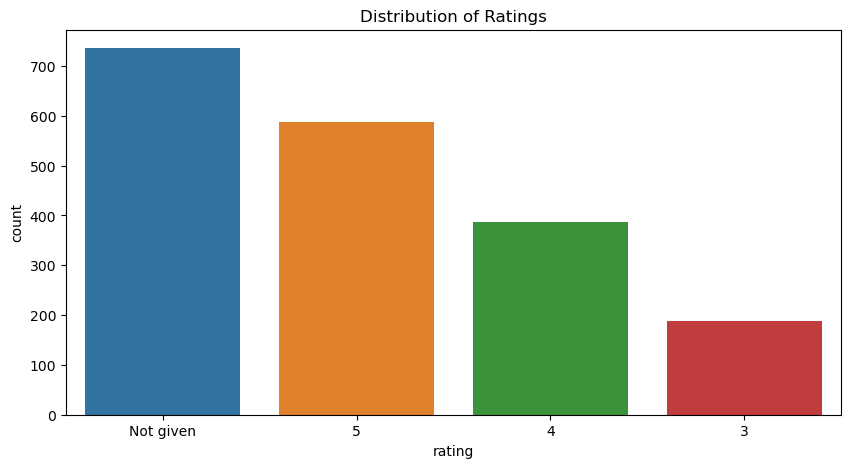

Cuisine type and the ratio of restaurants to orders:
      cuisine_type  restaurant_to_order_ratio
0         American                   0.070205
1          Chinese                   0.074419
2           French                   0.166667
3           Indian                   0.191781
4          Italian                   0.104027
5         Japanese                   0.061702
6           Korean                   0.384615
7    Mediterranean                   0.108696
8          Mexican                   0.142857
9   Middle Eastern                   0.142857
10        Southern                   0.117647
11         Spanish                   0.250000
12            Thai                   0.473684
13      Vietnamese                   0.428571


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Histogram for cost_of_the_order
plt.subplot(2, 3, 1)
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Cost of the Order')

# Histogram for food_preparation_time
plt.subplot(2, 3, 2)
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preparation Time')

# Histogram for delivery_time
plt.subplot(2, 3, 3)
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')

# Count plot for restaurant_name (showing top 10 restaurants for better visualization)
plt.subplot(2, 3, 4)
top_10_restaurants = df['restaurant_name'].value_counts().head(10).index
sns.countplot(data=df[df['restaurant_name'].isin(top_10_restaurants)], y='restaurant_name', order=top_10_restaurants)
plt.title('Top 10 Restaurants by Number of Orders')

# Count plot for cuisine_type
plt.subplot(2, 3, 5)
sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title('Distribution of Cuisine Types')

# Count plot for day_of_the_week
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='day_of_the_week', order=['Weekday', 'Weekend'])
plt.title('Distribution of Orders by Day of the Week')


plt.tight_layout()
plt.show()

# Set up the matplotlib figure for boxplots
plt.figure(figsize=(15, 5))

# Boxplot for cost_of_the_order
plt.subplot(1, 3, 1)
sns.boxplot(y=df['cost_of_the_order'])
plt.title('Boxplot of Cost of the Order')

# Boxplot for food_preparation_time
plt.subplot(1, 3, 2)
sns.boxplot(y=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')

# Boxplot for delivery_time
plt.subplot(1, 3, 3)
sns.boxplot(y=df['delivery_time'])
plt.title('Boxplot of Delivery Time')

plt.tight_layout()
plt.show()

# Count plot for rating (including 'Not given')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

# Count the number of unique restaurants per cuisine type
unique_restaurants_per_genre = df.groupby('cuisine_type')['restaurant_name'].nunique().reset_index()
unique_restaurants_per_genre.columns = ['cuisine_type', 'unique_restaurants']

# Count the number of orders per cuisine type
orders_per_genre = df['cuisine_type'].value_counts().reset_index()
orders_per_genre.columns = ['cuisine_type', 'total_orders']

# Merge the two DataFrames on cuisine_type
genre_stats = pd.merge(unique_restaurants_per_genre, orders_per_genre, on='cuisine_type')

# Calculate the ratio of restaurants to orders for each cuisine type
genre_stats['restaurant_to_order_ratio'] = genre_stats['unique_restaurants'] / genre_stats['total_orders']

# Select only cuisine_type and restaurant_to_order_ratio columns for the final output
genre_ratio = genre_stats[['cuisine_type', 'restaurant_to_order_ratio']]

# Display the results
print("Cuisine type and the ratio of restaurants to orders:")
print(genre_ratio)


In [21]:
#### Observations:
# Food costs is most commonly between 10-15 dollars, but can vary. Fairly normal distribution.
# Food prep time is between 20-35 but without outliers. Not normal distribution.
# Delivery time is most commonly between 25-30 minutes but can vary. Fairly normal distribution.
# Most ratings are not given, but it is not normally distributed.
# Categorical count data shows us Shake Shack is the most popular restaurant. 
# American and Japanese are the most popular cuisines and the weekend is the most popular time 
# American and Japanese also have the lowest restaurant-to-order ratio.
# Thai and Vietnamese have a high restaurant-to-order ratio.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [10]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants in terms of the number of orders received:")
print(top_5_restaurants)

Top 5 restaurants in terms of the number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
These observations highlight the top 5 restaurants in terms of customer orders. Shake Shack stands out significantly, followed by The Meatball Shop and Blue Ribbon Sushi, indicating customer preferences for these establishments.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [11]:
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().idxmax()
most_popular_cuisine_weekend_count = weekend_orders['cuisine_type'].value_counts().max()
print(f"The most popular cuisine on weekends is {most_popular_cuisine_weekend} with {most_popular_cuisine_weekend_count} orders.")

The most popular cuisine on weekends is American with 415 orders.


#### Observations:
The most popular cuisine on weekends is American with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [12]:
# Calculate the percentage of orders that cost more than 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage_above_20 = (len(orders_above_20) / len(df)) * 100

print(f"The percentage of orders that cost more than 20 dollars is {percentage_above_20:.2f}%")

The percentage of orders that cost more than 20 dollars is 29.24%


#### Observations:
The percentage of orders that cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [13]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is {mean_delivery_time:.2f} minutes")

The mean order delivery time is 24.16 minutes


#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [14]:
# Find the top 3 most frequent customers
top_3_customers = df['customer_id'].value_counts().head(3)

# Display the IDs of the top 3 customers and the number of orders they placed
print("Top 3 most frequent customers and the number of orders they placed:")
print(top_3_customers)

Top 3 most frequent customers and the number of orders they placed:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:

The top 3 most frequent customers eligible for the 20% discount vouchers are Customer ID 52832 with 13 orders, Customer ID 47440 with 10 orders, and Customer ID 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


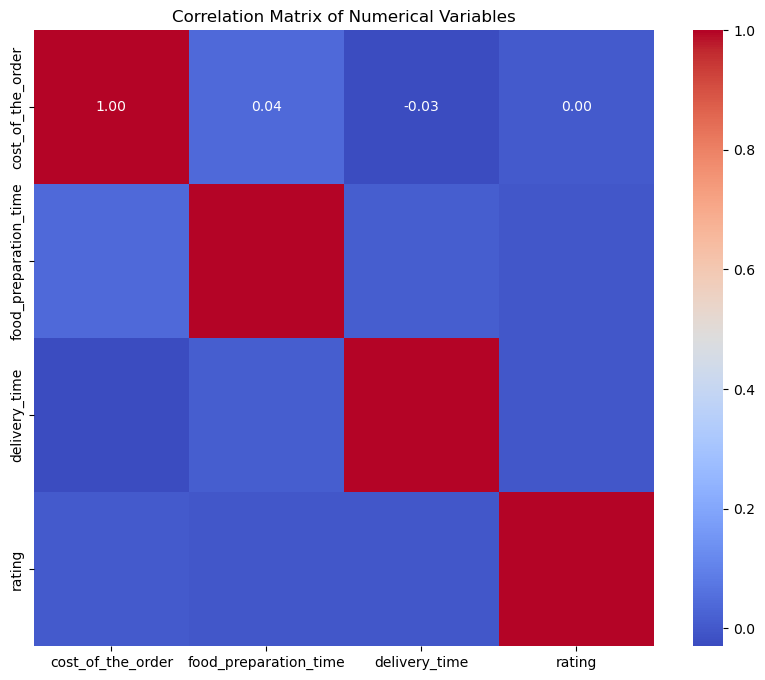

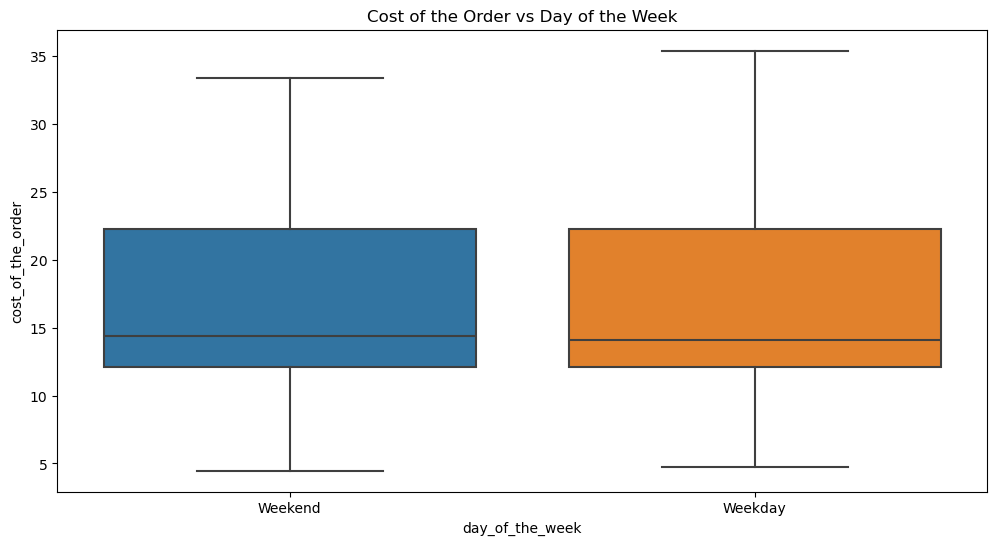

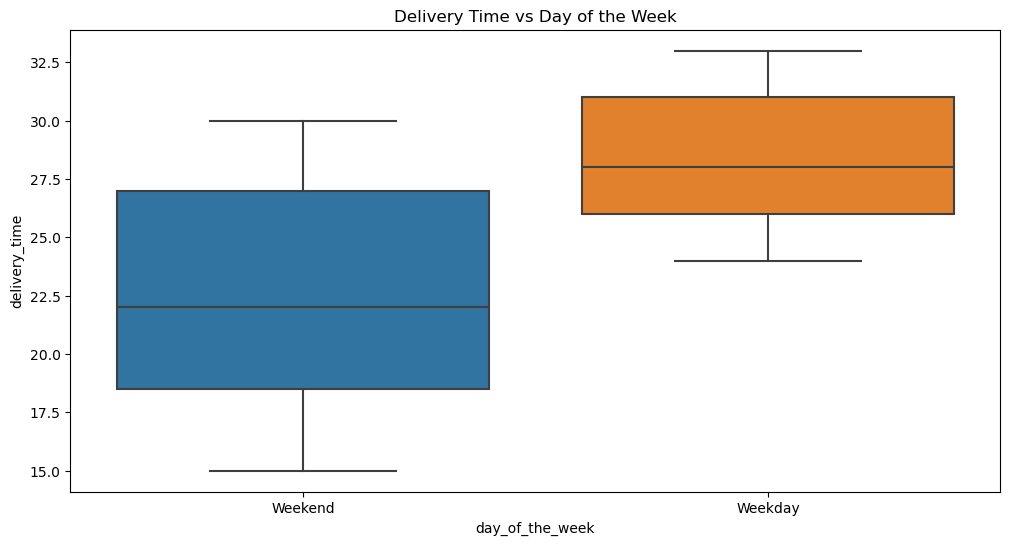

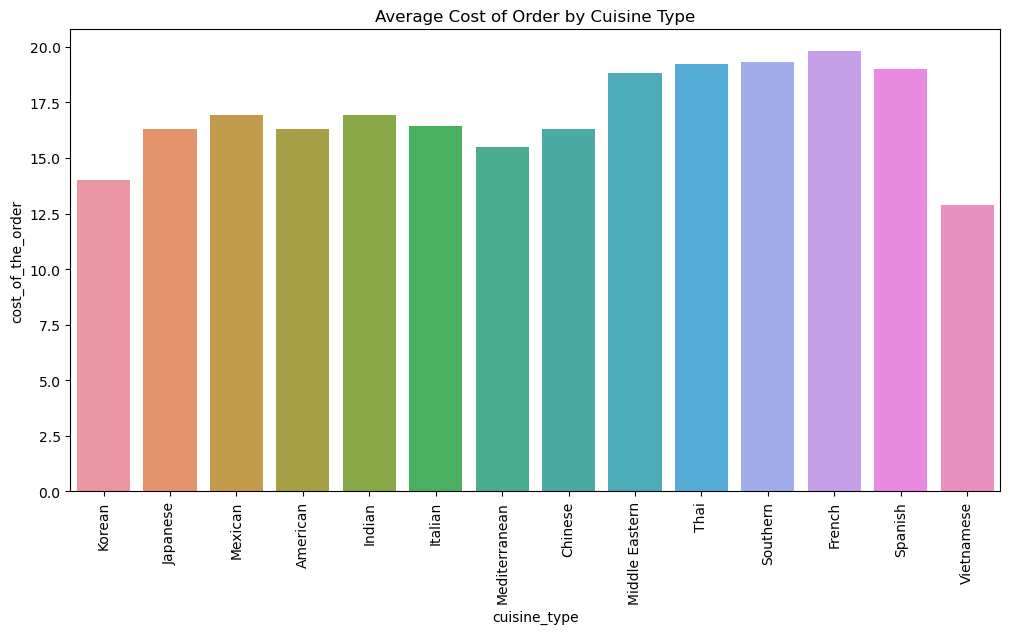

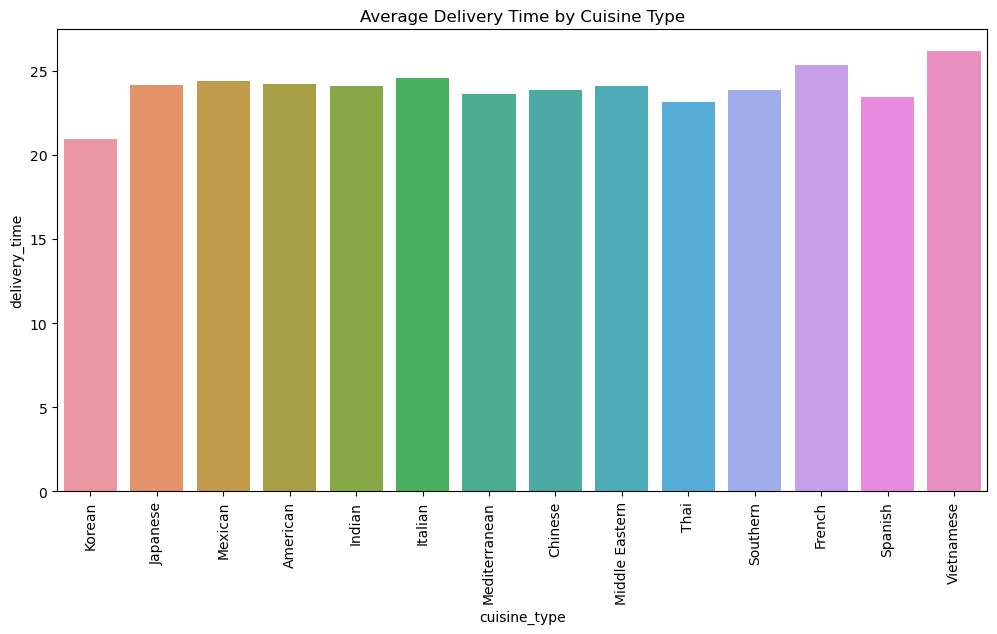

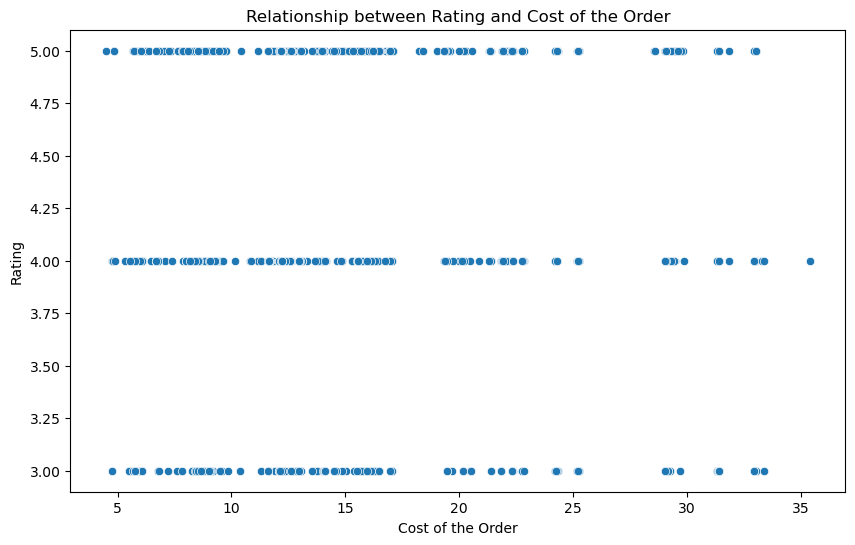

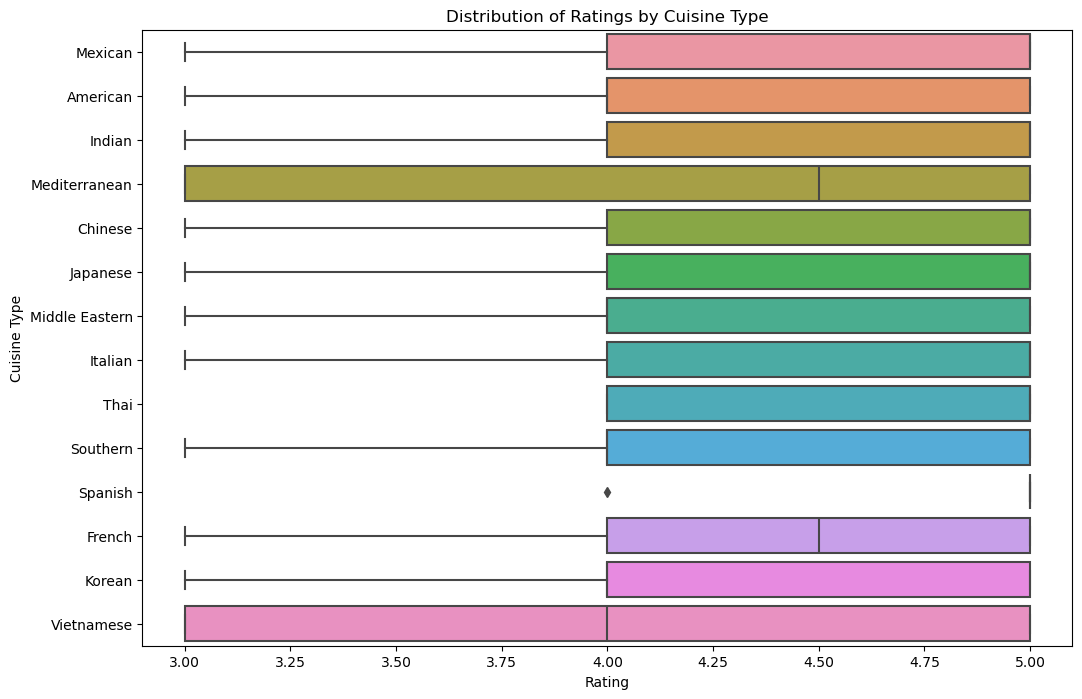

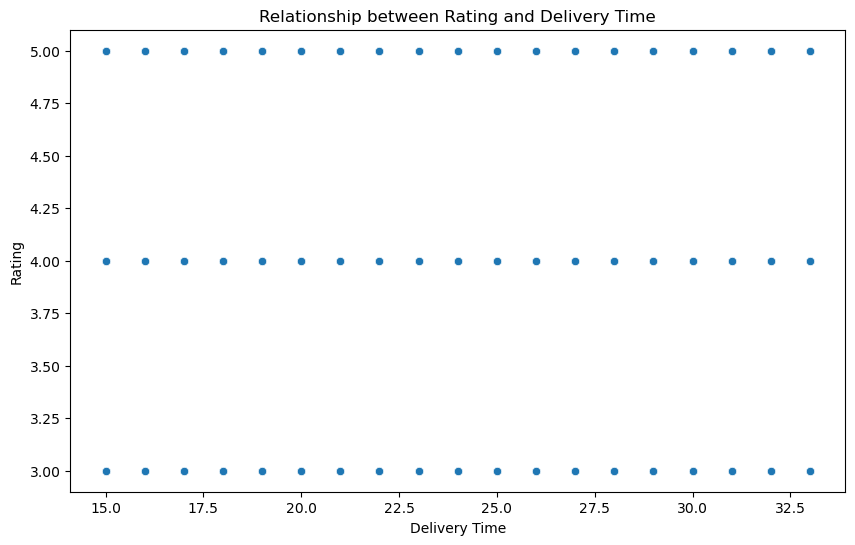

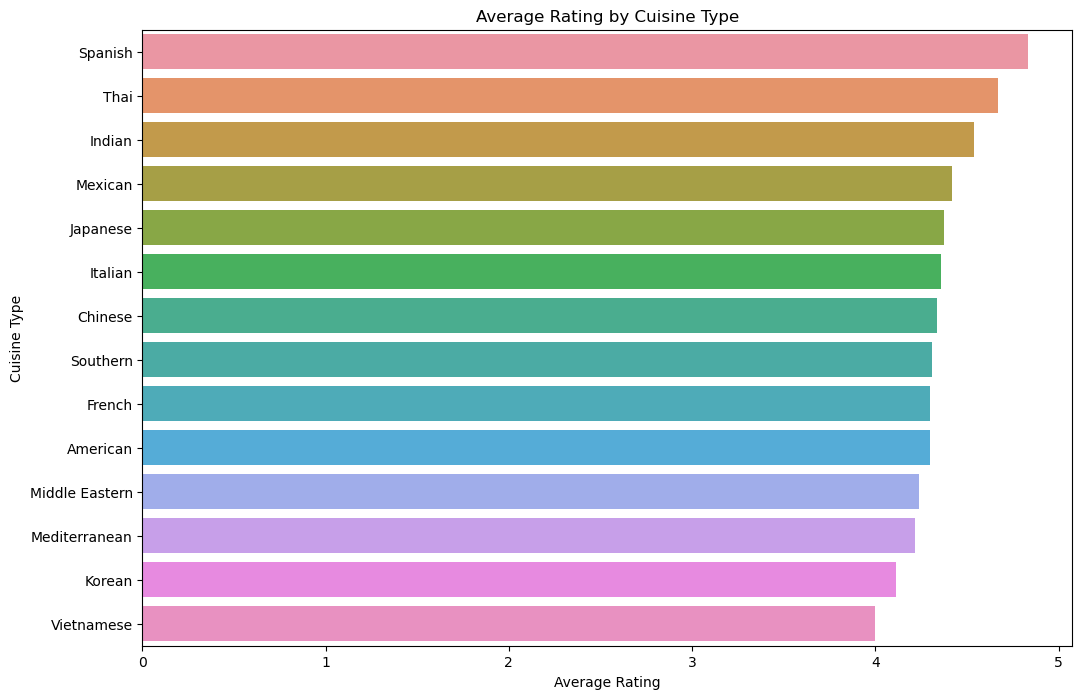

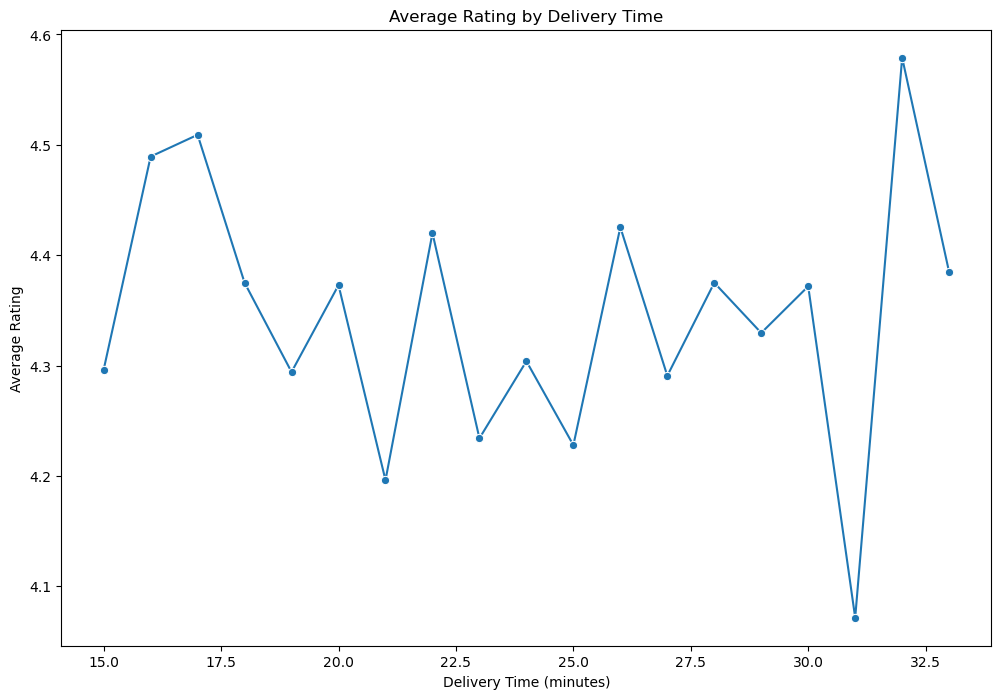

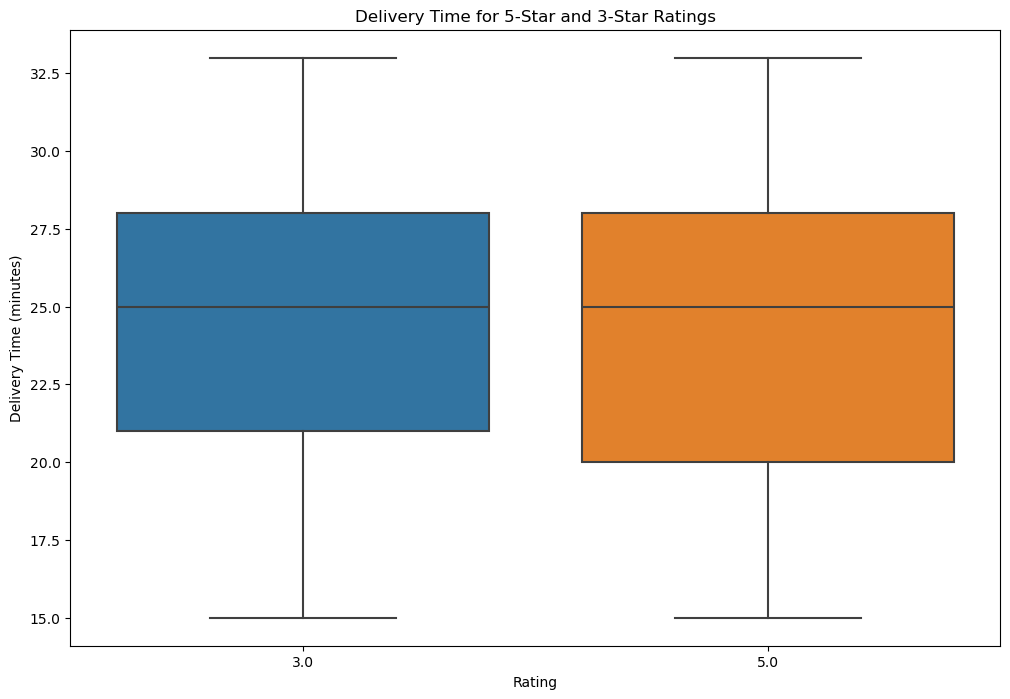

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'Not given' placeholders with NaN in the rating column
df['rating'] = df['rating'].replace('Not given', np.nan)
# Ensure the correct data types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Drop rows with missing values in important columns for analysis purposes
df.dropna(subset=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], inplace=True)

# Replace missing values in 'rating' with the median
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)

# Perform analysis

# 1. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 3. Box Plot for Numerical vs Categorical
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Cost of the Order vs Day of the Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time vs Day of the Week')
plt.show()

# 4. Bar Plot for Categorical vs Aggregate Numerical
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df, estimator=np.mean, ci=None)
plt.title('Average Cost of Order by Cuisine Type')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine_type', y='delivery_time', data=df, estimator=np.mean, ci=None)
plt.title('Average Delivery Time by Cuisine Type')
plt.xticks(rotation=90)
plt.show()

# Let's analyze rating when only rated
# Load the dataset
file_path = 'foodhub_order.csv'
df = pd.read_csv(file_path)
df['rating'] = df['rating'].replace('Not given', np.nan)
# Ensure the correct data types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')
# Drop rows with missing values in the rating column
df.dropna(subset=['rating'], inplace=True)


# Scatter plot for Rating vs. Cost of the Order
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_of_the_order', y='rating', data=df)
plt.title('Relationship between Rating and Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Rating')
plt.show()

# Box plot for Rating vs. Cuisine Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='cuisine_type', data=df)
plt.title('Distribution of Ratings by Cuisine Type')
plt.xlabel('Rating')
plt.ylabel('Cuisine Type')
plt.show()

# Scatter plot for Rating vs. Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_time', y='rating', data=df)
plt.title('Relationship between Rating and Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Rating')
plt.show()

# Calculate the average rating by cuisine type
avg_rating_by_cuisine = df.groupby('cuisine_type')['rating'].mean().reset_index()

# Sort by average rating
avg_rating_by_cuisine = avg_rating_by_cuisine.sort_values(by='rating', ascending=False)

# Plot the average rating by cuisine type
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='cuisine_type', data=avg_rating_by_cuisine)
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()

# Calculate the average rating by delivery time
avg_rating_by_delivery_time = df.groupby('delivery_time')['rating'].mean().reset_index()

# Plot the average rating by delivery time
plt.figure(figsize=(12, 8))
sns.lineplot(x='delivery_time', y='rating', data=avg_rating_by_delivery_time, marker='o')
plt.title('Average Rating by Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Average Rating')
plt.show()

# Filter data for 5-star and 3-star ratings
filtered_df = df[df['rating'].isin([3, 5])]

# Box plot for delivery time between 5-star and 3-star ratings
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='delivery_time', data=filtered_df)
plt.title('Delivery Time for 5-Star and 3-Star Ratings')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()


In [16]:
#### Observations: 
# There's not much correlation between rating and delivery time or rating in cost.  
# Certain Cusine types do have longer delivery times and lower ratings. Certain cuisine types also have lower costs. 
# Vietnamese has low ratings and low costs and long delivery times.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [17]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'foodhub_order.csv'
df = pd.read_csv(file_path)

# Replace 'Not given' placeholders with NaN in the rating column
df['rating'] = df['rating'].replace('Not given', np.nan)

# Ensure the correct data types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Replace missing values in 'rating' with the median
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)

# Group by restaurant_name to calculate the count and mean of ratings
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants with rating count > 50 and average rating > 4
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the restaurants fulfilling the criteria
print("Restaurants fulfilling the criteria for the promotional offer:")
print(promotional_restaurants)


Restaurants fulfilling the criteria for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     96  4.552083
Blue Ribbon Sushi            119  4.521008
Parm                          68  4.500000
RedFarm Broadway              59  4.474576
RedFarm Hudson                55  4.490909
Shake Shack                  219  4.561644
The Meatball Shop            132  4.689394


#### Observations:
3 American 2 Italian and one Japanese restaurant

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [18]:
# Load the dataset
file_path = 'foodhub_order.csv'
df = pd.read_csv(file_path)

# Calculate the revenue for each order based on the given criteria
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the net revenue generated by the company
net_revenue = df['revenue'].sum()

print(f"The net revenue generated by the company across all orders is ${net_revenue:.2f}")


The net revenue generated by the company across all orders is $6166.30


#### Observations:
The net revenue generated by the company across all orders is $6166.30
If we can get more high cost orders we can increase this.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [19]:
# Calculate the total delivery time for each order
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the number of orders taking more than 60 minutes
orders_above_60 = df[df['total_delivery_time'] > 60]

# Calculate the percentage of orders taking more than 60 minutes
percentage_above_60 = (len(orders_above_60) / len(df)) * 100

print(f"The percentage of orders that take more than 60 minutes to get delivered is {percentage_above_60:.2f}%")

The percentage of orders that take more than 60 minutes to get delivered is 10.54%


#### Observations:
About 1/10 of orders take more than 60 minutes to deliver.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [20]:
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print the results
print("Mean delivery time on weekdays and weekends:")
print(mean_delivery_time)

Mean delivery time on weekdays and weekends:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
Weekend delivery is faster by 6 minutes even though we are busier.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. Popular Cuisines:
American, Japanese, Italian, and Chinese are the four most popular types of cuisine. These cuisines also have a low restaurant-to-order ratio, indicating high demand relative to the number of available restaurants.

2. Order Volume on Weekends:
Despite weekends comprising only two days, they account for more than twice the number of orders compared to weekdays. This indicates a significant surge in demand over the weekend.

3. Delivery Time:
Delivery times are actually lower on weekends, suggesting that the company is effectively managing staffing and logistics to handle higher order volumes during these peak times.

4. Rating and Cost Relationship:
There is little correlation between rating and cost, although most orders fall within the $10-$15 range.

5. Issues with Vietnamese Restaurants:
Vietnamese restaurants have the lowest ratings and the highest delivery times. They also have the lowest prices and a high restaurant-to-order ratio, indicating poor performance and potential oversupply.

### Recommendations:
1. Focus on High-Demand Cuisines:
Consider increasing partnerships with American, Japanese, Italian, and Chinese restaurants to meet the high demand and improve the restaurant-to-order ratio. This could help in maintaining customer satisfaction and meeting order volumes efficiently.

2. Optimize Weekend Operations:
Continue optimizing staffing and delivery logistics over the weekend to handle the higher order volumes effectively. This might involve further analysis of peak order times and adjusting delivery personnel shifts accordingly.

3. Review Vietnamese Restaurant Partnerships:
Evaluate the performance of Vietnamese restaurant partners. Given their lower ratings and higher delivery times, consider reducing the number of underperforming Vietnamese restaurants. This could help in reallocating resources to more popular and higher-rated cuisines.

4. Pricing Strategies:
Although there is little correlation between rating and cost, it’s important to maintain a balanced pricing strategy. Ensure that popular price points ($10-$15) are well-represented in the menu offerings.

5. Customer Feedback and Ratings:
Enhance customer feedback mechanisms to gather more detailed insights into the reasons behind lower ratings for certain restaurants. Use this feedback to work with restaurant partners on improving food quality and delivery efficiency.

---